Point 1 54.933833889946 -31.041104011745 1751638733
Point 2 55.483222615751 -30.547733231949 1751638744
Point 3 56.026634201504 -30.051620537527 1751638755
Point 4 56.612804346604 -29.507368169174 1751638767
Point 5 57.192222212858 -28.960043623081 1751638779
Point 6 57.717579041653 -28.455715060042 1751638790
Point 7 58.237558411988 -27.948957582658 1751638801
Point 8 58.752294724715 -27.439846078119 1751638812
Point 9 59.354050324544 -26.835224958394 1751638825
Point 10 59.903379500105 -26.274377179725 1751638837
Point 11 60.401909905684 -25.7580313865 1751638848
Point 12 60.940439125237 -25.192387081418 1751638860
Point 13 61.473576107461 -24.624363262994 1751638872
Point 14 62.001489375824 -24.054035905791 1751638884
Point 15 62.524337877605 -23.481486717408 1751638896
Point 16 63.042285166818 -22.906787911587 1751638908
Point 17 63.555487117232 -22.330015694664 1751638920
Point 18 64.106278943855 -21.702925763997 1751638933
Point 19 64.610090714726 -21.122065215078 1751638945
Poin

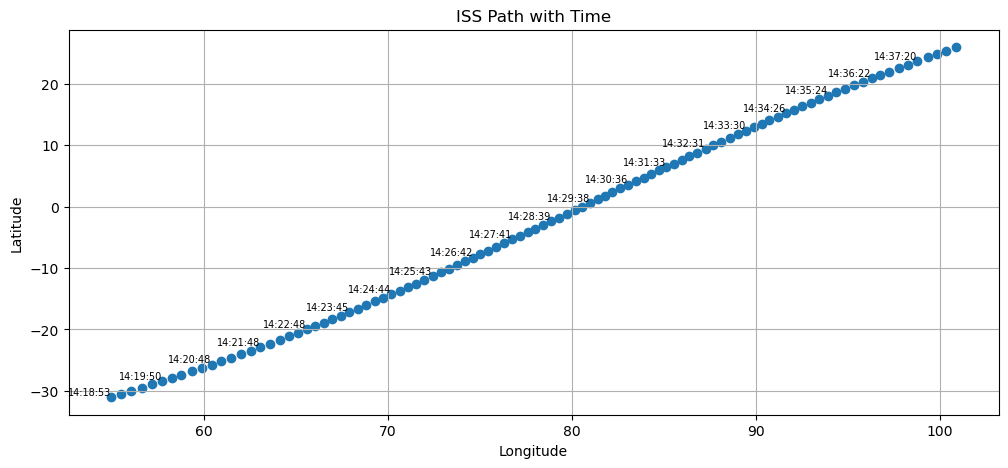

In [1]:
import requests
import time
import json

url = "https://api.wheretheiss.at/v1/satellites/25544"
datapoints = 0

datalist = []

while True:
    if datapoints == 100:
        break

    try:
        data = json.loads(requests.get(url).text)
        datalist.append(
            {
                "longitude": data["longitude"],
                "latitude": data["latitude"],
                "timestamp": data["timestamp"],
            }
        )
        datapoints += 1
        print("Point " + str(datapoints) + " " + str(data["longitude"]) + " " + str(data["latitude"]) + " " + str(data["timestamp"]))
        time.sleep(10)
    except:
        print("Error")
    

# plots the datapoints
import matplotlib.pyplot as plt
import datetime

latitudes = []
longitudes = []
timestamps = []

for point in datalist:
    latitudes.append(point["latitude"])
    longitudes.append(point["longitude"])
    timestamps.append(datetime.datetime.fromtimestamp(point["timestamp"], datetime.UTC).strftime("%H:%M:%S"))

plt.figure(figsize=(12, 5))
plt.scatter(longitudes, latitudes)

for i in range(0, len(timestamps), 5):
    plt.text(longitudes[i], latitudes[i], timestamps[i], fontsize=7, ha='right', va='bottom')
    
plt.title("ISS Path with Time")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.grid(True)
plt.show()